<a href="https://colab.research.google.com/github/Ultan-Kearns/LYIT-Machine-Learning-Project/blob/main/CA3Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading files and importing libraries

In [330]:
#import libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib 
import matplotlib.pyplot as plt

from google.colab import files
import io

uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['wdbcwh.csv']), header = 0)

Saving wdbcwh.csv to wdbcwh (12).csv


# Prepping and analyzing the data
In this section we prep and analyze the data we do this by dividing the data into two groups training and testing.  We will train the models with the training data so that we can predict the values within the testing dataset.  We randomize the data to produce a more accurate model and to show us the variation in performance of our models as the data is different everytime. We could also use a random seed to produce the same "random" set of rows everytime, although we wanted to avoid this to reduce our models bias towards the data when training and testing our models.

In [361]:
# Show dataset
# split data into training and test datasets
X = df[0:570]
y = X
# Drop ID from the dataframe, it is not useful for our purposes except for identifying unique files
X = X.drop(['ID'],axis=1)
y = y.drop(['ID'],axis=1)
from sklearn.model_selection import train_test_split
# could use random state 42 for same results every time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)


Here we are showing some of the values in our training sets and our test sets, by doing this we can see that we have a decent amount of randomness in our data

In [362]:
print('X_train ',X_train)
print('y_train ',y_train)
print('X_test ',X_test)
print('y_test ',y_test)

X_train      Diagnosis  Mean_Radius  ...  Worst_Symmetry  Worst_Fractal_Dimension
99          M       14.420  ...          0.2718                  0.09353
533         M       20.470  ...          0.3220                  0.06386
307         B        9.000  ...          0.2991                  0.07804
359         B        9.436  ...          0.2454                  0.08136
119         M       17.950  ...          0.4882                  0.06111
..        ...          ...  ...             ...                      ...
379         M       11.080  ...          0.4154                  0.14030
130         B       12.190  ...          0.3469                  0.09241
324         B       12.200  ...          0.2661                  0.07961
366         M       20.200  ...          0.3271                  0.07632
509         M       15.460  ...          0.3013                  0.10670

[284 rows x 31 columns]
y_train      Diagnosis  Mean_Radius  ...  Worst_Symmetry  Worst_Fractal_Dimension
99      

We show the shape of our test and training sets here, when using different split values we will get differing results.  It is important to know the shape of our sets as we can reshape them if needed to fit our models

In [363]:
# print test sets shape will be same as training sets shape
print('X_test set shape: ',X_test.shape)
print('y_test set shape: ',y_test.shape)
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)

X_test set shape:  (285, 31)
y_test set shape:  (285, 31)
X_train shape:  (284, 31)
y_train shape:  (284, 31)


Here we are replacing diagnosis values with a 1 for malignant and a 0 for benign, we do this because it makes it easier to perform numerical calculations on the sets. 

In [364]:
# Disabled pandas warning due to false positive
pd.options.mode.chained_assignment = None  # default='warn'


# Replace malignant with 1 and benign with 0
X_train['Diagnosis'] = X_train['Diagnosis'].replace({'M':1,'B':0})
y_train['Diagnosis'] = y_train['Diagnosis'].replace({'M':1,'B':0})
X_test['Diagnosis'] = X_test['Diagnosis'].replace({'M':1,'B':0})
y_test['Diagnosis'] = y_test['Diagnosis'].replace({'M':1,'B':0})

# resetting pandas warning
pd.options.mode.chained_assignment = 'warn'  # default='warn'


## Show standard deviation and variance between sets

Here we are showing both the standard deviation and variance of the sets, these are good methods for detecting outliers in our set, as we can see both sets have a somewhat high level of standard deviation.  We may try dropping columns from our dataframe to try and reduce this.  We can also see from these variables the amount of variation in certain features or throughout the overall dataset, these are useful metrics when training the models as we can ensure the models are trained with a large variety of different values.

Standard deviation is calculated by calculating the sum of each element in our data set then subtracting the population mean from the element and squaring we then divide by n and get the square root

Variance is calculated by essentially the same way but without getting the square root of our end result

In [365]:
print('Standard deviation of values in x training set ',X_train.std())
print('Variance of diagnosis values in x training set: ', X_train.var())

Standard deviation of values in x training set  Diagnosis                    0.486313
Mean_Radius                  3.473079
Mean_Texture                 4.339999
Mean_Perimeter              23.989918
Mean_Area                  346.226536
Mean_Smoothness              0.013460
Mean_Compactness             0.051762
Mean_Concavity               0.079583
Mean_Concave_Points          0.039007
Mean_Symmetry                0.027814
Mean_Fractal_Dimension       0.006694
Radius_SE                    0.267412
Texture_SE                   0.550442
Perimeter_SE                 1.955354
Area_SE                     45.760952
Smoothness_SE                0.002930
Compactness_SE               0.015687
Concavity_SE                 0.031347
Concave_Points_SE            0.006561
Symmetry_SE                  0.008766
Fractal_Dimension_SE         0.002479
Worst_Radius                 4.859093
Worst_Texture                6.124030
Worst_Perimeter             33.662857
Worst_Area                 579.726238
Wo

In [366]:

print('Standard deviation of values in y training set ',y_train.std())
print('Variance of values in y training set: ', y_train.var())

Standard deviation of values in y training set  Diagnosis                    0.486313
Mean_Radius                  3.473079
Mean_Texture                 4.339999
Mean_Perimeter              23.989918
Mean_Area                  346.226536
Mean_Smoothness              0.013460
Mean_Compactness             0.051762
Mean_Concavity               0.079583
Mean_Concave_Points          0.039007
Mean_Symmetry                0.027814
Mean_Fractal_Dimension       0.006694
Radius_SE                    0.267412
Texture_SE                   0.550442
Perimeter_SE                 1.955354
Area_SE                     45.760952
Smoothness_SE                0.002930
Compactness_SE               0.015687
Concavity_SE                 0.031347
Concave_Points_SE            0.006561
Symmetry_SE                  0.008766
Fractal_Dimension_SE         0.002479
Worst_Radius                 4.859093
Worst_Texture                6.124030
Worst_Perimeter             33.662857
Worst_Area                 579.726238
Wo

In [367]:
print('Standard deviation of values in x testing set ',X_test.std())
print('Variance of values in x testing set: ', X_test.var())


Standard deviation of values in x testing set  Diagnosis                    0.482252
Mean_Radius                  3.577801
Mean_Texture                 4.269491
Mean_Perimeter              24.629187
Mean_Area                  357.925833
Mean_Smoothness              0.014664
Mean_Compactness             0.053925
Mean_Concavity               0.079967
Mean_Concave_Points          0.038653
Mean_Symmetry                0.027055
Mean_Fractal_Dimension       0.007417
Radius_SE                    0.287195
Texture_SE                   0.551849
Perimeter_SE                 2.088146
Area_SE                     45.270832
Smoothness_SE                0.003077
Compactness_SE               0.019895
Concavity_SE                 0.029035
Concave_Points_SE            0.005760
Symmetry_SE                  0.007742
Fractal_Dimension_SE         0.002807
Worst_Radius                 4.812641
Worst_Texture                6.178663
Worst_Perimeter             33.582814
Worst_Area                 559.446121
Wor

In [368]:
print('Standard deviation of values in y testing set ',y_test.std())
print('Variance of values in y testing set: ', y_test.var())

Standard deviation of values in y testing set  Diagnosis                    0.482252
Mean_Radius                  3.577801
Mean_Texture                 4.269491
Mean_Perimeter              24.629187
Mean_Area                  357.925833
Mean_Smoothness              0.014664
Mean_Compactness             0.053925
Mean_Concavity               0.079967
Mean_Concave_Points          0.038653
Mean_Symmetry                0.027055
Mean_Fractal_Dimension       0.007417
Radius_SE                    0.287195
Texture_SE                   0.551849
Perimeter_SE                 2.088146
Area_SE                     45.270832
Smoothness_SE                0.003077
Compactness_SE               0.019895
Concavity_SE                 0.029035
Concave_Points_SE            0.005760
Symmetry_SE                  0.007742
Fractal_Dimension_SE         0.002807
Worst_Radius                 4.812641
Worst_Texture                6.178663
Worst_Perimeter             33.582814
Worst_Area                 559.446121
Wor

## Show correlation
Here we are showing the correlation between each feature within the dataset.  Correlation is determined by analyzing the values of different features and comparing them with each other.  A 1 means that the values of the feature match exactly a value of -1 means that the values have very little in common.  It is important that we use a wide variety of features which have low correlation as it will yield more accurate results.  I have shown correlations of features for both the X and Y triaining and test sets.

### Training Set Correlation values

In [369]:
# Show correlation of our training set
X_train.corr(method='pearson')

,Diagnosis,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
Diagnosis,1.000000,0.751729,0.402851,0.765329,0.732323,0.444163,0.646798,0.726382,0.812591,0.347889,0.017484,0.599807,0.028997,0.583446,0.567904,-0.031007,0.362503,0.259666,0.433395,0.027918,0.120164,0.789197,0.473279,0.793568,0.741102,0.496603,0.607527,0.686537,0.809616,0.444132,0.347096
Mean_Radius,0.751729,1.000000,0.332479,0.997805,0.988117,0.236240,0.539033,0.685803,0.834634,0.170081,-0.280722,0.708874,-0.089529,0.700031,0.744285,-0.200185,0.267506,0.200767,0.424533,-0.101275,-0.013403,0.974118,0.328089,0.971384,0.942545,0.222633,0.445721,0.576317,0.773745,0.216586,0.055835
Mean_Texture,0.402851,0.332479,1.000000,0.338529,0.343077,0.023415,0.238258,0.288318,0.299513,0.084554,-0.066019,0.314308,0.434400,0.327651,0.293455,0.081385,0.213447,0.118881,0.162749,0.045194,0.085904,0.346740,0.919981,0.353397,0.343951,0.121568,0.244059,0.261378,0.265264,0.103271,0.113973
Mean_Perimeter,0.765329,0.997805,0.338529,1.000000,0.986692,0.272358,0.589036,0.723128,0.861628,0.205261,-0.230093,0.720063,-0.079312,0.720570,0.752562,-0.186611,0.313713,0.232089,0.453898,-0.077605,0.021503,0.973504,0.333289,0.976357,0.942245,0.249518,0.486574,0.611338,0.799454,0.242573,0.097948
Mean_Area,0.732323,0.988117,0.343077,0.986692,1.000000,0.233248,0.524103,0.687693,0.828953,0.176839,-0.263366,0.765834,-0.060239,0.751252,0.812977,-0.157003,0.266380,0.208847,0.424128,-0.078949,0.004803,0.972339,0.327424,0.969566,0.967157,0.217471,0.419631,0.559422,0.752912,0.199429,0.045729
Mean_Smoothness,0.444163,0.236240,0.023415,0.272358,0.233248,1.000000,0.681662,0.578012,0.590754,0.521386,0.594824,0.314814,0.086751,0.309589,0.258170,0.300056,0.374800,0.283504,0.366258,0.186915,0.332753,0.267488,0.064840,0.289777,0.253051,0.790370,0.492347,0.502314,0.522225,0.393106,0.517979
Mean_Compactness,0.646798,0.539033,0.238258,0.589036,0.524103,0.681662,1.000000,0.887605,0.837414,0.603715,0.556478,0.507648,0.041926,0.587473,0.462417,0.054925,0.765312,0.548136,0.634873,0.220677,0.469253,0.560365,0.258513,0.617370,0.525926,0.577098,0.869399,0.850103,0.834235,0.555752,0.682283
Mean_Concavity,0.726382,0.685803,0.288318,0.723128,0.687693,0.578012,0.887605,1.000000,0.925977,0.511264,0.361872,0.645210,0.065725,0.676275,0.612500,0.055721,0.712667,0.688447,0.717629,0.149898,0.495511,0.696577,0.293158,0.735287,0.677976,0.491717,0.748811,0.903229,0.875887,0.436486,0.531442
Mean_Concave_Points,0.812591,0.834634,0.299513,0.861628,0.828953,0.590754,0.837414,0.925977,1.000000,0.466647,0.183516,0.707420,0.017252,0.727934,0.685087,-0.017730,0.539242,0.439581,0.626543,0.089361,0.285554,0.837612,0.308316,0.863117,0.808295,0.498842,0.674356,0.795309,0.920578,0.428338,0.395216
Mean_Symmetry,0.347889,0.170081,0.084554,0.205261,0.176839,0.521386,0.603715,0.511264,0.466647,1.000000,0.505960,0.352084,0.207982,0.377975,0.256266,0.098403,0.429361,0.346667,0.389035,0.493333,0.381807,0.199636,0.104985,0.233979,0.192836,0.326591,0.435125,0.418667,0.413786,0.724346,0.406532


In [370]:
y_train.corr(method='pearson')


,Diagnosis,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
Diagnosis,1.000000,0.751729,0.402851,0.765329,0.732323,0.444163,0.646798,0.726382,0.812591,0.347889,0.017484,0.599807,0.028997,0.583446,0.567904,-0.031007,0.362503,0.259666,0.433395,0.027918,0.120164,0.789197,0.473279,0.793568,0.741102,0.496603,0.607527,0.686537,0.809616,0.444132,0.347096
Mean_Radius,0.751729,1.000000,0.332479,0.997805,0.988117,0.236240,0.539033,0.685803,0.834634,0.170081,-0.280722,0.708874,-0.089529,0.700031,0.744285,-0.200185,0.267506,0.200767,0.424533,-0.101275,-0.013403,0.974118,0.328089,0.971384,0.942545,0.222633,0.445721,0.576317,0.773745,0.216586,0.055835
Mean_Texture,0.402851,0.332479,1.000000,0.338529,0.343077,0.023415,0.238258,0.288318,0.299513,0.084554,-0.066019,0.314308,0.434400,0.327651,0.293455,0.081385,0.213447,0.118881,0.162749,0.045194,0.085904,0.346740,0.919981,0.353397,0.343951,0.121568,0.244059,0.261378,0.265264,0.103271,0.113973
Mean_Perimeter,0.765329,0.997805,0.338529,1.000000,0.986692,0.272358,0.589036,0.723128,0.861628,0.205261,-0.230093,0.720063,-0.079312,0.720570,0.752562,-0.186611,0.313713,0.232089,0.453898,-0.077605,0.021503,0.973504,0.333289,0.976357,0.942245,0.249518,0.486574,0.611338,0.799454,0.242573,0.097948
Mean_Area,0.732323,0.988117,0.343077,0.986692,1.000000,0.233248,0.524103,0.687693,0.828953,0.176839,-0.263366,0.765834,-0.060239,0.751252,0.812977,-0.157003,0.266380,0.208847,0.424128,-0.078949,0.004803,0.972339,0.327424,0.969566,0.967157,0.217471,0.419631,0.559422,0.752912,0.199429,0.045729
Mean_Smoothness,0.444163,0.236240,0.023415,0.272358,0.233248,1.000000,0.681662,0.578012,0.590754,0.521386,0.594824,0.314814,0.086751,0.309589,0.258170,0.300056,0.374800,0.283504,0.366258,0.186915,0.332753,0.267488,0.064840,0.289777,0.253051,0.790370,0.492347,0.502314,0.522225,0.393106,0.517979
Mean_Compactness,0.646798,0.539033,0.238258,0.589036,0.524103,0.681662,1.000000,0.887605,0.837414,0.603715,0.556478,0.507648,0.041926,0.587473,0.462417,0.054925,0.765312,0.548136,0.634873,0.220677,0.469253,0.560365,0.258513,0.617370,0.525926,0.577098,0.869399,0.850103,0.834235,0.555752,0.682283
Mean_Concavity,0.726382,0.685803,0.288318,0.723128,0.687693,0.578012,0.887605,1.000000,0.925977,0.511264,0.361872,0.645210,0.065725,0.676275,0.612500,0.055721,0.712667,0.688447,0.717629,0.149898,0.495511,0.696577,0.293158,0.735287,0.677976,0.491717,0.748811,0.903229,0.875887,0.436486,0.531442
Mean_Concave_Points,0.812591,0.834634,0.299513,0.861628,0.828953,0.590754,0.837414,0.925977,1.000000,0.466647,0.183516,0.707420,0.017252,0.727934,0.685087,-0.017730,0.539242,0.439581,0.626543,0.089361,0.285554,0.837612,0.308316,0.863117,0.808295,0.498842,0.674356,0.795309,0.920578,0.428338,0.395216
Mean_Symmetry,0.347889,0.170081,0.084554,0.205261,0.176839,0.521386,0.603715,0.511264,0.466647,1.000000,0.505960,0.352084,0.207982,0.377975,0.256266,0.098403,0.429361,0.346667,0.389035,0.493333,0.381807,0.199636,0.104985,0.233979,0.192836,0.326591,0.435125,0.418667,0.413786,0.724346,0.406532


### Test set correlation values

In [371]:
X_test.corr(method='pearson')

,Diagnosis,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
Diagnosis,1.000000,0.708979,0.427896,0.720508,0.686425,0.280672,0.548930,0.666189,0.740001,0.312303,-0.039929,0.537171,-0.047628,0.530887,0.527941,-0.102281,0.242788,0.247336,0.380112,-0.046879,0.040893,0.763418,0.440506,0.772073,0.726241,0.352853,0.575616,0.633908,0.777028,0.392676,0.303479
Mean_Radius,0.708979,1.000000,0.315624,0.997903,0.986649,0.112866,0.476489,0.667882,0.810885,0.125123,-0.338532,0.652230,-0.108373,0.650530,0.727574,-0.244667,0.162409,0.187486,0.324328,-0.110371,-0.067693,0.965396,0.267026,0.959288,0.940539,0.028095,0.384046,0.481061,0.715521,0.118841,-0.035808
Mean_Texture,0.427896,0.315624,1.000000,0.321025,0.299893,-0.066965,0.235406,0.316774,0.287391,0.057716,-0.086235,0.240245,0.339241,0.238707,0.225605,-0.065515,0.177686,0.170142,0.165860,-0.032198,0.026577,0.358780,0.904287,0.362970,0.343399,0.036446,0.311353,0.340017,0.326605,0.106952,0.124398
Mean_Perimeter,0.720508,0.997903,0.321025,1.000000,0.986340,0.149941,0.527981,0.709221,0.840703,0.160488,-0.288820,0.666225,-0.097407,0.668061,0.737464,-0.218935,0.206400,0.224111,0.357226,-0.088526,-0.028665,0.965798,0.273749,0.964744,0.941675,0.062386,0.427645,0.519714,0.743722,0.143168,0.009701
Mean_Area,0.686425,0.986649,0.299893,0.986340,1.000000,0.127780,0.475551,0.684223,0.817964,0.125666,-0.300169,0.702717,-0.075014,0.704289,0.787688,-0.176888,0.174803,0.206699,0.317145,-0.067635,-0.040917,0.953814,0.249167,0.949284,0.952382,0.040317,0.363768,0.469227,0.692055,0.095588,-0.033060
Mean_Smoothness,0.280672,0.112866,-0.066965,0.149941,0.127780,1.000000,0.639605,0.472244,0.521147,0.593999,0.576506,0.290509,0.052797,0.285082,0.236864,0.361093,0.280094,0.215538,0.401055,0.218084,0.243995,0.163860,0.010154,0.193050,0.164044,0.817950,0.455074,0.375671,0.486788,0.395228,0.483444
Mean_Compactness,0.548930,0.476489,0.235406,0.527981,0.475551,0.639605,1.000000,0.879909,0.826344,0.602686,0.573431,0.489168,0.051652,0.515339,0.450263,0.209036,0.724841,0.595982,0.656600,0.242683,0.540313,0.512380,0.238562,0.565290,0.495111,0.555465,0.862485,0.785119,0.798538,0.470874,0.692029
Mean_Concavity,0.666189,0.667882,0.316774,0.709221,0.684223,0.472244,0.879909,1.000000,0.916790,0.489782,0.315812,0.620051,0.084631,0.645937,0.622056,0.138331,0.646537,0.695395,0.647446,0.209276,0.410504,0.679646,0.306296,0.723659,0.673930,0.410577,0.761874,0.866254,0.846714,0.386773,0.501308
Mean_Concave_Points,0.740001,0.810885,0.287391,0.840703,0.817964,0.521147,0.826344,0.916790,1.000000,0.458013,0.152982,0.690140,0.023520,0.695094,0.695321,0.070333,0.459604,0.439027,0.605152,0.101287,0.233938,0.822782,0.277068,0.848569,0.811014,0.411252,0.661715,0.711304,0.899496,0.329514,0.345400
Mean_Symmetry,0.312303,0.125123,0.057716,0.160488,0.125666,0.593999,0.602686,0.489782,0.458013,1.000000,0.458328,0.257321,0.045403,0.252716,0.190086,0.273931,0.422922,0.338191,0.399032,0.398725,0.288411,0.170865,0.075937,0.203565,0.160074,0.522849,0.512035,0.449084,0.447513,0.680262,0.470427


In [372]:
y_test.corr(method='pearson')

,Diagnosis,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
Diagnosis,1.000000,0.708979,0.427896,0.720508,0.686425,0.280672,0.548930,0.666189,0.740001,0.312303,-0.039929,0.537171,-0.047628,0.530887,0.527941,-0.102281,0.242788,0.247336,0.380112,-0.046879,0.040893,0.763418,0.440506,0.772073,0.726241,0.352853,0.575616,0.633908,0.777028,0.392676,0.303479
Mean_Radius,0.708979,1.000000,0.315624,0.997903,0.986649,0.112866,0.476489,0.667882,0.810885,0.125123,-0.338532,0.652230,-0.108373,0.650530,0.727574,-0.244667,0.162409,0.187486,0.324328,-0.110371,-0.067693,0.965396,0.267026,0.959288,0.940539,0.028095,0.384046,0.481061,0.715521,0.118841,-0.035808
Mean_Texture,0.427896,0.315624,1.000000,0.321025,0.299893,-0.066965,0.235406,0.316774,0.287391,0.057716,-0.086235,0.240245,0.339241,0.238707,0.225605,-0.065515,0.177686,0.170142,0.165860,-0.032198,0.026577,0.358780,0.904287,0.362970,0.343399,0.036446,0.311353,0.340017,0.326605,0.106952,0.124398
Mean_Perimeter,0.720508,0.997903,0.321025,1.000000,0.986340,0.149941,0.527981,0.709221,0.840703,0.160488,-0.288820,0.666225,-0.097407,0.668061,0.737464,-0.218935,0.206400,0.224111,0.357226,-0.088526,-0.028665,0.965798,0.273749,0.964744,0.941675,0.062386,0.427645,0.519714,0.743722,0.143168,0.009701
Mean_Area,0.686425,0.986649,0.299893,0.986340,1.000000,0.127780,0.475551,0.684223,0.817964,0.125666,-0.300169,0.702717,-0.075014,0.704289,0.787688,-0.176888,0.174803,0.206699,0.317145,-0.067635,-0.040917,0.953814,0.249167,0.949284,0.952382,0.040317,0.363768,0.469227,0.692055,0.095588,-0.033060
Mean_Smoothness,0.280672,0.112866,-0.066965,0.149941,0.127780,1.000000,0.639605,0.472244,0.521147,0.593999,0.576506,0.290509,0.052797,0.285082,0.236864,0.361093,0.280094,0.215538,0.401055,0.218084,0.243995,0.163860,0.010154,0.193050,0.164044,0.817950,0.455074,0.375671,0.486788,0.395228,0.483444
Mean_Compactness,0.548930,0.476489,0.235406,0.527981,0.475551,0.639605,1.000000,0.879909,0.826344,0.602686,0.573431,0.489168,0.051652,0.515339,0.450263,0.209036,0.724841,0.595982,0.656600,0.242683,0.540313,0.512380,0.238562,0.565290,0.495111,0.555465,0.862485,0.785119,0.798538,0.470874,0.692029
Mean_Concavity,0.666189,0.667882,0.316774,0.709221,0.684223,0.472244,0.879909,1.000000,0.916790,0.489782,0.315812,0.620051,0.084631,0.645937,0.622056,0.138331,0.646537,0.695395,0.647446,0.209276,0.410504,0.679646,0.306296,0.723659,0.673930,0.410577,0.761874,0.866254,0.846714,0.386773,0.501308
Mean_Concave_Points,0.740001,0.810885,0.287391,0.840703,0.817964,0.521147,0.826344,0.916790,1.000000,0.458013,0.152982,0.690140,0.023520,0.695094,0.695321,0.070333,0.459604,0.439027,0.605152,0.101287,0.233938,0.822782,0.277068,0.848569,0.811014,0.411252,0.661715,0.711304,0.899496,0.329514,0.345400
Mean_Symmetry,0.312303,0.125123,0.057716,0.160488,0.125666,0.593999,0.602686,0.489782,0.458013,1.000000,0.458328,0.257321,0.045403,0.252716,0.190086,0.273931,0.422922,0.338191,0.399032,0.398725,0.288411,0.170865,0.075937,0.203565,0.160074,0.522849,0.512035,0.449084,0.447513,0.680262,0.470427


# Training the linear regression model

Here we are using linear regression to compare features in our model to see the correlation between them.  We are training this model to show us how dependent the variables are on one another.

# Creating linear regression model for Area Severity and Smoothness Severity
Here I have trained a model to show us the negative correlation between two features in our dataset, we can clearly see from this model that the smoothness severity has a negative impact on the Area Severity.  When the smoothness severity value increases then on average the area severity value decreases and vice versa.

y test r^2 value:  1.0
mean_squared_error value:  9.442274150920509e-06
Coefficient:  [[7.60861069e-07]]
Intercept:  [0.0070767]
predict  [[0.00719342]]


(285, 31)

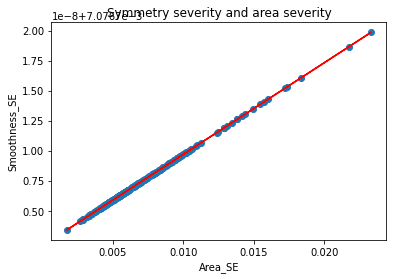

In [373]:
# Here we train a model to perform linear regression data set to predict the diagnosis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from scipy import stats
# create the linear regression model by fitting training set to the test set
y_testArray = np.array(y_test['Smoothness_SE']).reshape(-1,1)
y_trainArray = np.array(y_train['Smoothness_SE']).reshape(-1,1)
X_trainArray = np.array(X_train['Area_SE']).reshape(-1,1)
X_testArray = np.array(X_test['Area_SE']).reshape(-1,1)
regression_model = LinearRegression().fit(X_trainArray, y_trainArray)
# Score the model and retrive r^2 value
y_pred = regression_model.predict(y_testArray)
rSquared = regression_model.score(y_testArray, y_pred)
print('y test r^2 value: ', rSquared)
print('mean_squared_error value: ', mean_squared_error(y_testArray, y_pred))
print('Coefficient: ',regression_model.coef_)
print('Intercept: ',regression_model.intercept_)

plt.xlabel("Area_SE")
plt.ylabel("Smoothness_SE")
plt.title('Symmetry severity and area severity')
plt.scatter(y_testArray,y_pred)
plt.plot(y_testArray,y_pred,c='r')
print('predict ',regression_model.predict([[153.4]]))
y_test.shape


# Positive correlation
Here we compare the concave points severity with the concavity severity, we see that there is a positive linear correlation between the two variables, we also see that the R^2 value is one which indicates a possible overfitting of our model.  We can see clearly from this graph that the two variables have a high correlation and that if the value increases in one of the variables then we can predict that the other variable also increases

y test r^2 value:  1.0
mean_squared_error value:  3.248870269834764e-05
Coefficient:  [[0.16967133]]
Intercept:  [0.00652185]


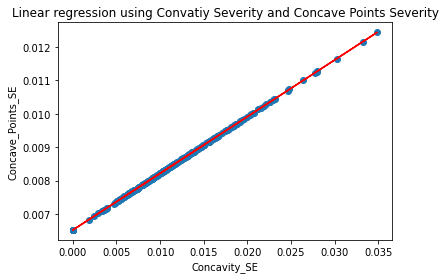

In [374]:
# create the linear regression model by fitting training set to the test set
y_testArray = np.array(y_test['Concave_Points_SE']).reshape(-1,1)
y_trainArray = np.array(y_train['Concave_Points_SE']).reshape(-1,1)
X_trainArray = np.array(X_train['Concavity_SE']).reshape(-1,1)
X_testArray = np.array(X_test['Concavity_SE']).reshape(-1,1)
# here we need to reshape the data using numpy so that the training data matches the testdata
regression_model = LinearRegression().fit(X_trainArray, y_trainArray)
# Score the model and retrive r^2 value
y_pred = regression_model.predict(y_testArray)
rSquared = regression_model.score(y_testArray, y_pred)
print('y test r^2 value: ', rSquared)
print('mean_squared_error value: ', mean_squared_error(y_testArray, y_pred))
print('Coefficient: ',regression_model.coef_)
print('Intercept: ',regression_model.intercept_)
plt.xlabel("Concavity_SE")
plt.ylabel("Concave_Points_SE")
plt.title('Linear regression using Convatiy Severity and Concave Points Severity')
plt.scatter(y_testArray,y_pred)
plt.plot(y_testArray,y_pred,c='r')

# Examples of low and high correlation in our dataset

Additionally we can see here the Mean Perimeter has a positive correlation with our Mean Radius feature.  Below this image we can see an example of low negative correlation, these variables don't really impact each other much

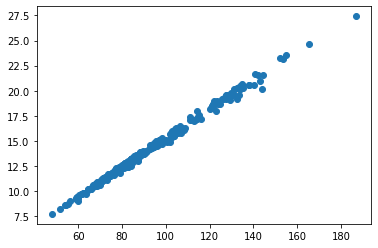

In [375]:
# Example of positive Linear correlation between radius and perimeter
# since these correlate highly we can remove one of them from set

plt.scatter(X_train['Mean_Perimeter'],X_train['Mean_Radius'])


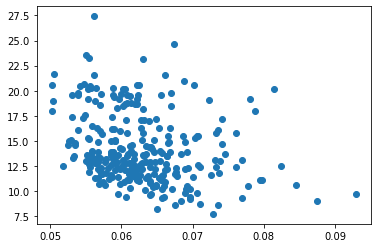

In [376]:
# example of low negative correlation
plt.scatter(X_train['Mean_Fractal_Dimension'],X_train['Mean_Radius'])


# KNN Predictions

Here we are using KNN to make predictions based on a number of features fed into the model.  As we can see it's score is 0.96 which isn't perfect but it's better to avoid overfitting the model so that it can adapt to new data

In [377]:
# K Nearest Neighbour

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train[['Diagnosis']])
print('Performance on X_test: ',knn.score(X_train,y_train['Diagnosis']))


Performance on X_test:  0.9507042253521126


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


In [378]:
# Make prediction on testSet
X_predictions = knn.predict(X_test)
y_predictions = knn.predict(y_test)
X_trainPredictions = knn.predict(X_train)
y_trainPredictions = knn.predict(y_train)


In [379]:
correct = 0;
count = 0;
actualValues = np.array(X_test['Diagnosis']).reshape(-1,1)
for i in actualValues:
  print('Actual: ', actualValues[count], ' Predicted: ', X_predictions[count])
  if X_predictions[count] == actualValues[count]:
    correct+=1
  count+=1
print('Total values: ',count, ' correctly predicted values: ',correct)

correct = 0;
count = 0;
actualValues = np.array(X_train['Diagnosis']).reshape(-1,1)
for i in actualValues:
  print('Actual: ', actualValues[count], ' Predicted: ', X_trainPredictions[count])
  if X_trainPredictions[count] == actualValues[count]:
    correct+=1
  count+=1
print('Total values: ',count, ' correctly predicted values: ',correct)


Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [1]  Predic

In [380]:
correct = 0;
count = 0;
actualValues = np.array(y_test['Diagnosis']).reshape(-1,1)
for i in actualValues:
  print('Actual: ', actualValues[count], ' Predicted: ', y_predictions[count])
  if y_predictions[count] == actualValues[count]:
    correct+=1
  count+=1
print('Total values: ',count, ' correctly predicted values: ',correct)

correct = 0;
count = 0;
actualValues = np.array(y_train['Diagnosis']).reshape(-1,1)

for i in actualValues:
  print('Actual: ', actualValues[count], ' Predicted: ', y_trainPredictions[count])
  if y_trainPredictions[count] == actualValues[count]:
    correct+=1
  count+=1
print('Total values: ',count, ' correctly predicted values: ',correct)



Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [1]  Predic

# Naive Bayes prediction of diagnosis

Here we use naive bayes on both sets to perform  the diagnosis based on a few features from the dataset, I chose the features used to train this model by selecting features which appear to have a high influence on the diagnosis, in Naive Bayes the weights of the features have no bearing on the output.  The model below is performing accurately but perhaps it is overfitting which is why I included two Naive Bayes Models in this notebook, the only difference being the number of features.  

## References

Sklearn documentation: https://scikit-learn.org/stable/modules/naive_bayes.html

In [381]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(X_train[['Mean_Radius','Mean_Texture','Mean_Perimeter','Mean_Area','Mean_Smoothness','Mean_Compactness','Mean_Concavity','Mean_Concave_Points','Mean_Symmetry','Mean_Fractal_Dimension','Radius_SE','Texture_SE','Perimeter_SE','Area_SE','Smoothness_SE','Compactness_SE','Concavity_SE','Concave_Points_SE']],y_train['Diagnosis'])
XDiagnosisPrediction = naive_bayes.predict(X_test[['Diagnosis']])
yDiagnosisPrediction = naive_bayes.predict(y_test[['Diagnosis']])
XTrainDiagnosisPrediction = naive_bayes.predict(X_train[['Diagnosis']])
YTrainDiagnosisPrediction = naive_bayes.predict(y_train[['Diagnosis']])


In [382]:
correct = 0;
count = 0;
actualValues = np.array(X_test['Diagnosis']).reshape(-1,1)
for i in actualValues:
  print('Actual: ', actualValues[count], ' Predicted: ', XDiagnosisPrediction[count])
  if actualValues[count] == XDiagnosisPrediction[count]:
    correct+=1
  count+=1
print('Total values: ',count, ' correctly predicted values: ',correct)

correct = 0;
count = 0;
actualValues = np.array(X_train['Diagnosis']).reshape(-1,1)
for i in actualValues:
  print('Actual: ', actualValues[count], ' Predicted: ', XTrainDiagnosisPrediction[count])
  if actualValues[count] == XTrainDiagnosisPrediction[count]:
    correct+=1
  count+=1
print('Total values: ',count, ' correctly predicted values: ',correct)


Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [1]  Predic

In [383]:
correct = 0;
count = 0;
actualValues = np.array(y_test['Diagnosis']).reshape(-1,1)
for i in actualValues:
  print('Actual: ', actualValues[count], ' Predicted: ', yDiagnosisPrediction[count])
  if actualValues[count] == yDiagnosisPrediction[count]:
    correct+=1
  count+=1
print('Total values: ',count, ' correctly predicted values: ',correct)
correct = 0;
count = 0;
actualValues = np.array(y_train['Diagnosis']).reshape(-1,1)
for i in actualValues:
  print('Actual: ', actualValues[count], ' Predicted: ', YTrainDiagnosisPrediction[count])
  if actualValues[count] == YTrainDiagnosisPrediction[count]:
    correct+=1
  count+=1
print('Total values: ',count, ' correctly predicted values: ',correct)

Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [1]  Predic

# Second Naive Bayes Model
As we can see the model below has worse performance than the model above, you may be asking why we've included this model, the reason why is that the above model seems to be trained a little too well on our training data and may not be able to predict values outside of our dataset too well.

In [386]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(X_train[['Radius_SE','Texture_SE','Perimeter_SE','Area_SE','Smoothness_SE','Compactness_SE','Concavity_SE','Concave_Points_SE','Mean_Radius','Mean_Texture','Mean_Perimeter','Mean_Area']],y_train[['Diagnosis']])
XDiagnosisPrediction = naive_bayes.predict(X_test[['Texture_SE']])
yDiagnosisPrediction = naive_bayes.predict(y_test[['Texture_SE']])

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [387]:
correct = 0;
count = 0;
actualValues = np.array(y_test['Diagnosis']).reshape(-1,1)
for i in actualValues:
  print('Actual: ', actualValues[count], ' Predicted: ', yDiagnosisPrediction[count])
  if actualValues[count] == yDiagnosisPrediction[count]:
    correct+=1
  count+=1
print('Total values: ',count, ' correctly predicted values: ',correct)


Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predic

In [388]:
correct = 0;
count = 0;
actualValues = np.array(X_test['Diagnosis']).reshape(-1,1)
for i in actualValues:
  print('Actual: ', actualValues[count], ' Predicted: ', XDiagnosisPrediction[count])
  if XDiagnosisPrediction[count] == actualValues[count]:
    correct+=1
  count+=1
print('Total values: ',count, ' correctly predicted values: ',correct)


Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predic